# Protein exercise 1

Proteins are large biomolecules and macromolecules that comprise one or more long chains of amino acid residues. Proteins perform a vast array of functions within organisms, including catalysing metabolic reactions, DNA replication, responding to stimuli, providing structure to cells and organisms, and transporting molecules from one location to another. Proteins differ from one another primarily in their sequence of amino acids, which is dictated by the nucleotide sequence of their genes, and which usually results in protein folding into a specific 3D structure that determines its activity.

A linear chain of amino acid residues is called a polypeptide.

![Protein Translation - wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b1/Ribosome_mRNA_translation_en.svg/1920px-Ribosome_mRNA_translation_en.svg.png)



## Python
Easy to code: Python is very easy to learn the language as compared to other languages \
● Free and Open Source: It means that Python source code is freely available to the public
for download \
● Object-Oriented Language: One of the key features of python is Object-Oriented
programming \
● High-Level Language:When we write programs in python, we do not need to remember
the system architecture, nor do we need to manage the memory. \
● Extensible feature:We can write us some Python code into C or C++ language \
● Python is Portable language: Python code for windows can be run on other platforms such
as Linux, Unix, and Mac \
● Interpreted Language: Python code is executed line by line at a time, there is no need to
compile python code. \
● Dynamically Typed Language: That means the type for a variable is decided at run time
not in advance, so we don’t need to specify the type of variable. 

## Jupyter Notebook

https://jupyter.org/


![](https://res.cloudinary.com/edlitera/image/upload/c_fill,f_auto/v1594161194/blog/wnnrl4n17gum2uxns2i9)


www: https://zebrafish.ipipan.waw.pl/jupyter/ \

login:      jupyter \
password:   GeczKMQEGVKdKxtUAzFxzem4k

In [1]:
# Install BioPython
pip install Bio

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import necessary libraries
import requests
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [5]:
# Define the UniProt accession IDs of the proteins to download
accession_ids = ["P80276"]  # Replace with the UniProt accession IDs you want to download

In [6]:
# Function to fetch protein sequences from UniProt
def fetch_protein_sequence(accession_id):
    url = f"https://www.uniprot.org/uniprot/{accession_id}.fasta"
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception if there's an error in the HTTP request
    return response.text

In [7]:
# Fetch and store the protein sequences
protein_sequences = []
for accession_id in accession_ids:
    sequence = fetch_protein_sequence(accession_id)
    protein_sequences.append(sequence)

In [8]:
# Print the protein sequences
for sequence in protein_sequences:
    print(sequence)

>sp|P80276|ALDR_PIG Aldo-keto reductase family 1 member B1 OS=Sus scrofa OX=9823 GN=AKR1B1 PE=1 SV=2
MASHLVLYTGAKMPILGLGTWKSPPGKVTEAVKVAIDLGYRHIDCAHVYQNENEVGLGLQ
EKLQGQVVKREDLFIVSKLWCTDHEKNLVKGACQTTLRDLKLDYLDLYLIHWPTGFKPGK
DPFPLDGDGNVVPDESDFVETWEAMEELVDEGLVKAIGVSNFNHLQVEKILNKPGLKYKP
AVNQIEVHPYLTQEKLIEYCKSKGIVVTAYSPLGSPDRPWAKPEDPSLLEDPRIKAIAAK
YNKTTAQVLIRFPMQRNLIVIPKSVTPERIAENFQVFDFELSPEDMNTLLSYNRNWRVCA
LMSCASHKDYPFHEEY



### What is "OS", "OX", "GN", "PE" and "SV" in the UniProt FASTA file?

In [9]:
"""
Calculate the length of a protein sequence
By splitting the string at the first newline character ('\n'), 
you separate the header from the protein sequence. The [1] index 
retrieves the second element, which is the protein sequence itself. 
The len() function then calculates the length of the protein sequence.
"""
protein_length = len(protein_sequences[0].split('\n', 1)[1])
print("Protein length:", protein_length)

Protein length: 322


In [13]:
seq= protein_sequences[0].split('\n', 1)[1]
seq

'MASHLVLYTGAKMPILGLGTWKSPPGKVTEAVKVAIDLGYRHIDCAHVYQNENEVGLGLQ\nEKLQGQVVKREDLFIVSKLWCTDHEKNLVKGACQTTLRDLKLDYLDLYLIHWPTGFKPGK\nDPFPLDGDGNVVPDESDFVETWEAMEELVDEGLVKAIGVSNFNHLQVEKILNKPGLKYKP\nAVNQIEVHPYLTQEKLIEYCKSKGIVVTAYSPLGSPDRPWAKPEDPSLLEDPRIKAIAAK\nYNKTTAQVLIRFPMQRNLIVIPKSVTPERIAENFQVFDFELSPEDMNTLLSYNRNWRVCA\nLMSCASHKDYPFHEEY\n'

In [11]:
# from Bio.SeqUtils import ProtParam
# import re

# # Remove invalid characters from the protein sequence
# valid_amino_acids = set("ACDEFGHIKLMNPQRSTVWY")  # Set of valid amino acid letters
# protein_sequence = re.sub(f"[^{''.join(valid_amino_acids)}]", "", protein_sequences[0])

# # Calculate the molecular weight of the protein sequence
# protein_mw = ProtParam.ProteinAnalysis(protein_sequence).molecular_weight()
# print("Protein molecular weight:", protein_mw)

In [17]:
analyzed_seq = ProteinAnalysis(str(seq))
analyzed_seq.molecular_weight()

35867.82520000004

In [18]:
analyzed_seq.count_amino_acids()

{'A': 18,
 'C': 6,
 'D': 19,
 'E': 24,
 'F': 10,
 'G': 18,
 'H': 9,
 'I': 16,
 'K': 26,
 'L': 34,
 'M': 6,
 'N': 14,
 'P': 22,
 'Q': 11,
 'R': 10,
 'S': 14,
 'T': 14,
 'V': 26,
 'W': 6,
 'Y': 13}

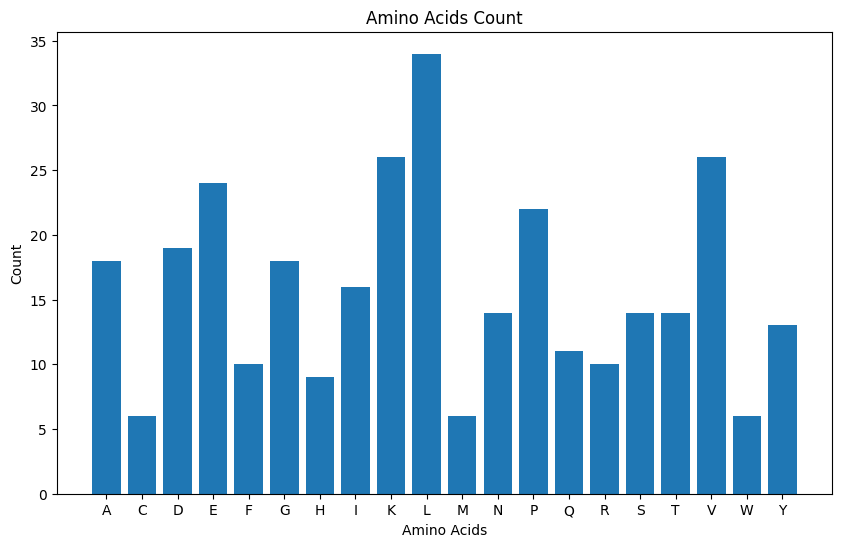

In [21]:
import matplotlib.pyplot as plt

# Assume analyzed_seq is your sequence object
amino_acids_count = analyzed_seq.count_amino_acids()

# Create lists of amino acids (keys) and their counts (values)
amino_acids = list(amino_acids_count.keys())
counts = list(amino_acids_count.values())

plt.figure(figsize=(10,6))  # Create a new figure with a specific size (optional)
plt.bar(amino_acids, counts)  # Create a bar plot
plt.xlabel('Amino Acids')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.title('Amino Acids Count')  # Plot title
plt.show()  # Show the plot


In [50]:
analyzed_seq.get_amino_acids_percent()

{'A': 0.055900621118012424,
 'C': 0.018633540372670808,
 'D': 0.059006211180124224,
 'E': 0.07453416149068323,
 'F': 0.031055900621118012,
 'G': 0.055900621118012424,
 'H': 0.027950310559006212,
 'I': 0.049689440993788817,
 'K': 0.08074534161490683,
 'L': 0.10559006211180125,
 'M': 0.018633540372670808,
 'N': 0.043478260869565216,
 'P': 0.06832298136645963,
 'Q': 0.034161490683229816,
 'R': 0.031055900621118012,
 'S': 0.043478260869565216,
 'T': 0.043478260869565216,
 'V': 0.08074534161490683,
 'W': 0.018633540372670808,
 'Y': 0.040372670807453416}

### Plot the results of %

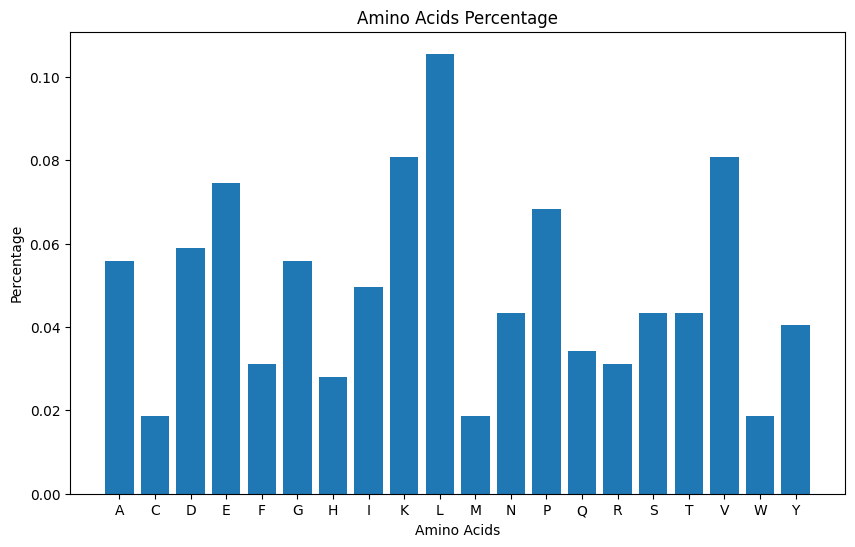

In [19]:
import matplotlib.pyplot as plt

# Assume analyzed_seq is your sequence object
amino_acids_percent = analyzed_seq.get_amino_acids_percent()

# Create lists of amino acids (keys) and their percentages (values)
amino_acids = list(amino_acids_percent.keys())
percentages = list(amino_acids_percent.values())

plt.figure(figsize=(10,6))  # Create a new figure with a specific size (optional)
plt.bar(amino_acids, percentages)  # Create a bar plot
plt.xlabel('Amino Acids')  # X-axis label
plt.ylabel('Percentage')  # Y-axis label
plt.title('Amino Acids Percentage')  # Plot title
plt.show()  # Show the plot


In [6]:
# Install necessary libraries
!pip install nglview

In [2]:
# Import libraries
import nglview as nv

In [24]:
import requests  # Importing the requests library to make HTTP requests

# This list contains UniProt accession IDs or protein names
accession_ids = ["P80276"]

# Function to fetch PDB IDs and download PDB files from UniProt
def fetch_and_save_pdbs(accession_id):
    # Form the URL to the txt format page for the given UniProt accession ID
    url = f"https://www.uniprot.org/uniprot/{accession_id}.txt"

    # Make a GET request to the URL
    response = requests.get(url)

    # If the GET request was unsuccessful, raise an exception
    response.raise_for_status()

    # Prepare an empty list to hold the PDB IDs
    pdb_ids = []

    # Loop through each line in the response text
    for line in response.text.splitlines():

        # If the line starts with "DR   PDB;", it contains a PDB ID
        if line.startswith("DR   PDB;"):
            
            # Extract the PDB ID from the line and append it to the list
            pdb_id = line.split()[2].rstrip(";")
            pdb_ids.append(pdb_id)

            # Form the URL to the PDB file for the PDB ID
            pdb_url = f"https://files.rcsb.org/download/{pdb_id}.pdb"

            # Make a GET request to the PDB URL
            pdb_response = requests.get(pdb_url)

            # If the GET request was unsuccessful, raise an exception
            pdb_response.raise_for_status()

            # Set the file path to save the PDB file
            pdb_file_path = f"{pdb_id}.pdb"

            # Open the file in write binary mode and write the content of the response to it
            with open(pdb_file_path, "wb") as file:
                file.write(pdb_response.content)
            
            # Print a message indicating the file was saved
            print(f"PDB file saved: {pdb_file_path}")

    # Return the list of PDB IDs
    return pdb_ids

# Prepare an empty list to hold the lists of PDB IDs for each UniProt accession ID
pdb_ids_list = []

# For each UniProt accession ID, fetch and save the PDB IDs and files
for accession_id in accession_ids:
    pdb_ids = fetch_and_save_pdbs(accession_id)
    pdb_ids_list.append(pdb_ids)

# Print the retrieved PDB IDs
for pdb_ids in pdb_ids_list:
    print("PDB IDs:", pdb_ids)

PDB file saved: 1AH0.pdb
PDB file saved: 1AH3.pdb
PDB file saved: 1AH4.pdb
PDB file saved: 1DLA.pdb
PDB file saved: 1EKO.pdb
PDB IDs: ['1AH0', '1AH3', '1AH4', '1DLA', '1EKO']


In [3]:
# Load protein structure data (PDB file)
protein_structure = nv.show_pdbid("1AH0")

# Display the protein structure
protein_structure

NGLWidget()

In [14]:
# Install necessary libraries
!pip install MDAnalysis



                                              0.0/3.2 MB ? eta -:--:--
     --                                       0.2/3.2 MB 4.8 MB/s eta 0:00:01
     --------------                           1.2/3.2 MB 12.4 MB/s eta 0:00:01
     ---------------------------------------  3.2/3.2 MB 22.7 MB/s eta 0:00:01
     ---------------------------------------- 3.2/3.2 MB 18.6 MB/s eta 0:00:00
                                              0.0/2.1 MB ? eta -:--:--
     ---------------------------------------- 2.1/2.1 MB 44.8 MB/s eta 0:00:00
                                              0.0/2.1 MB ? eta -:--:--
     ---------------------------------------- 2.1/2.1 MB 45.3 MB/s eta 0:00:00
                                              0.0/298.0 kB ? eta -:--:--
     ---------------------------------------- 298.0/298.0 kB ? eta 0:00:00
                                              0.0/205.2 kB ? eta -:--:--
     ------------------------------------- 205.2/205.2 kB 12.2 MB/s eta 0:00:00
             

In [26]:
# Import libraries
import nglview as nv
import MDAnalysis as mda


c:\Users\magda\AppData\Local\Programs\Python\Python311\Lib\site-packages\MDAnalysis\topology\TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


In [27]:
# Load and visualize protein structure from a PDB file
protein_structure = mda.Universe("1AH0.pdb")
protein_view = nv.show_mdanalysis(protein_structure)
protein_view.add_ball_and_stick()
protein_view

NGLWidget()

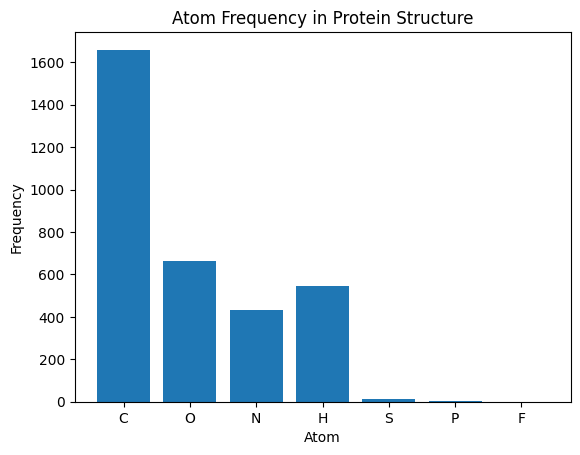

In [45]:
# Import libraries
import py3Dmol
import MDAnalysis as mda
import matplotlib.pyplot as plt

# Load and convert protein structure from a PDB file
protein_structure = mda.Universe("1AH0.pdb")
protein_atoms = protein_structure.select_atoms("all")
xyz = protein_atoms.positions
elements = protein_atoms.elements
# print(elements)
# print(elements.count())



# Calculate atom frequency
atom_freq = {}
for element in elements:
    if element in atom_freq:
        atom_freq[element] += 1
    else:
        atom_freq[element] = 1
atom_freq

# Plot atom frequency
plt.bar(atom_freq.keys(), atom_freq.values())
plt.xlabel("Atom")
plt.ylabel("Frequency")
plt.title("Atom Frequency in Protein Structure")
plt.show()

In [36]:
# Install necessary libraries
!pip install biopython


The isoelectric point 

 Ss defined as the pH at which the protein/peptide has a net of charge zero.

In [29]:


# Classify protein sequences based on their isoelectric point (pI)
for sequence in protein_sequences:
    protein_analysis = ProteinAnalysis(str(sequence))
    pI = protein_analysis.isoelectric_point()
    if pI < 7:
        print("Acidic protein")
    elif pI > 7:
        print("Basic protein")
    else:
        print("Neutral protein")


Acidic protein


In [42]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

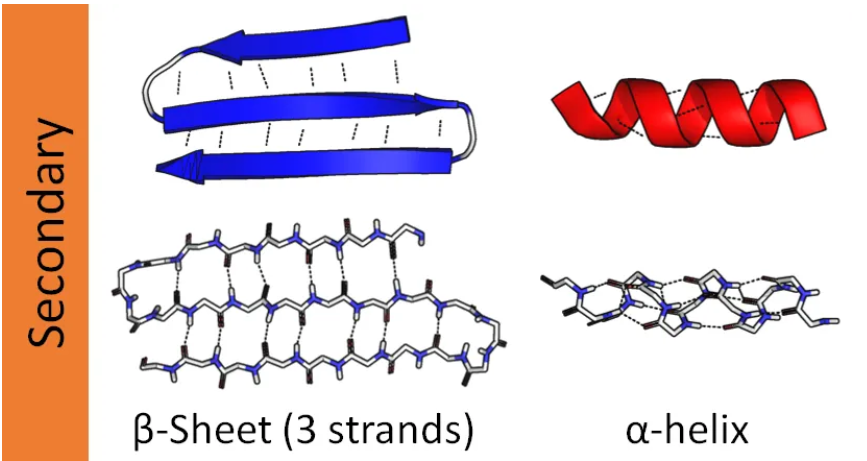

In [30]:
analyzed_seq.secondary_structure_fraction() # helix, turn, sheet

(0.32608695652173914, 0.2111801242236025, 0.25465838509316774)